In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
veri =np.array ([[1,2,np.nan],
                [4,np.nan,6],
                 [7,8,9],
                  [np.nan,10,11]])
imputer=SimpleImputer(strategy='median')
veri_imputed=imputer.fit_transform(veri)
print(veri_imputed)

[[ 1.  2.  9.]
 [ 4.  8.  6.]
 [ 7.  8.  9.]
 [ 4. 10. 11.]]


In [ ]:
#veri dönüşümü Polinomal özellik
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
veri=np.array([[2,3],
               [4,5],
               [6,7]])
print("orijinal veri:\n",veri)

poly=PolynomialFeatures(degree=2)
veri_poly=poly.fit_transform(veri)
print("polinomal veri:\n",veri_poly)

orijinal veri:
 [[2 3]
 [4 5]
 [6 7]]
polinomal veri:
 [[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]
 [ 1.  6.  7. 36. 42. 49.]]


In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
veri=np.array([[1,10],
               [2,100],
               [3,1000]])
log_donusum=FunctionTransformer(np.log1p)
veri_log=log_donusum.fit_transform(veri)
print(veri_log)

[[0.69314718 2.39789527]
 [1.09861229 4.61512052]
 [1.38629436 6.90875478]]


In [ ]:
#Feature Selection
# varyans yüksek oldukça veri seti ilişkisi sütun için o kadar bağlantılı özellik demektir.sabit değerleri temizlemek için de kullanılır.
#korelasyon tabanlı
#selectfrommodel

Veri setindeki değişen ile hedef değişken arasındaki korelasyona bakarak bağlantılı mı değil mi ona bakabiliyoruz.Korelasyon -1 0+1
korelasyon 1 olması demek özellikleride artıyor 1 artarken 2 artıyor
korelasyonun -1 olması demek özellikler de artıyor 1 azalırken 2 azalıyor
korelasyon 0 olması demek aralarında herhangi br işilki yok demektir
mutlak değeri yüksek bir özellği seçmem gerekebilir.
**SELECT FROM MODEL**




ÖZELLİK **SEÇİMİ**

Varyans verier arasındaki değişiklik. yüksek varyans iyi
Korelasyon 0 eleme sebebi
Select from modelde ise

iris dataseti sklearn içinde mevcut

Varyans Eşiği ile Seçilen Özellikler: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
Korelasyon ile Seçilen Özellikler: ['petal length (cm)' 'petal width (cm)']
Random Forest Modelinde Seçilen Özellikler: ['petal length (cm)']


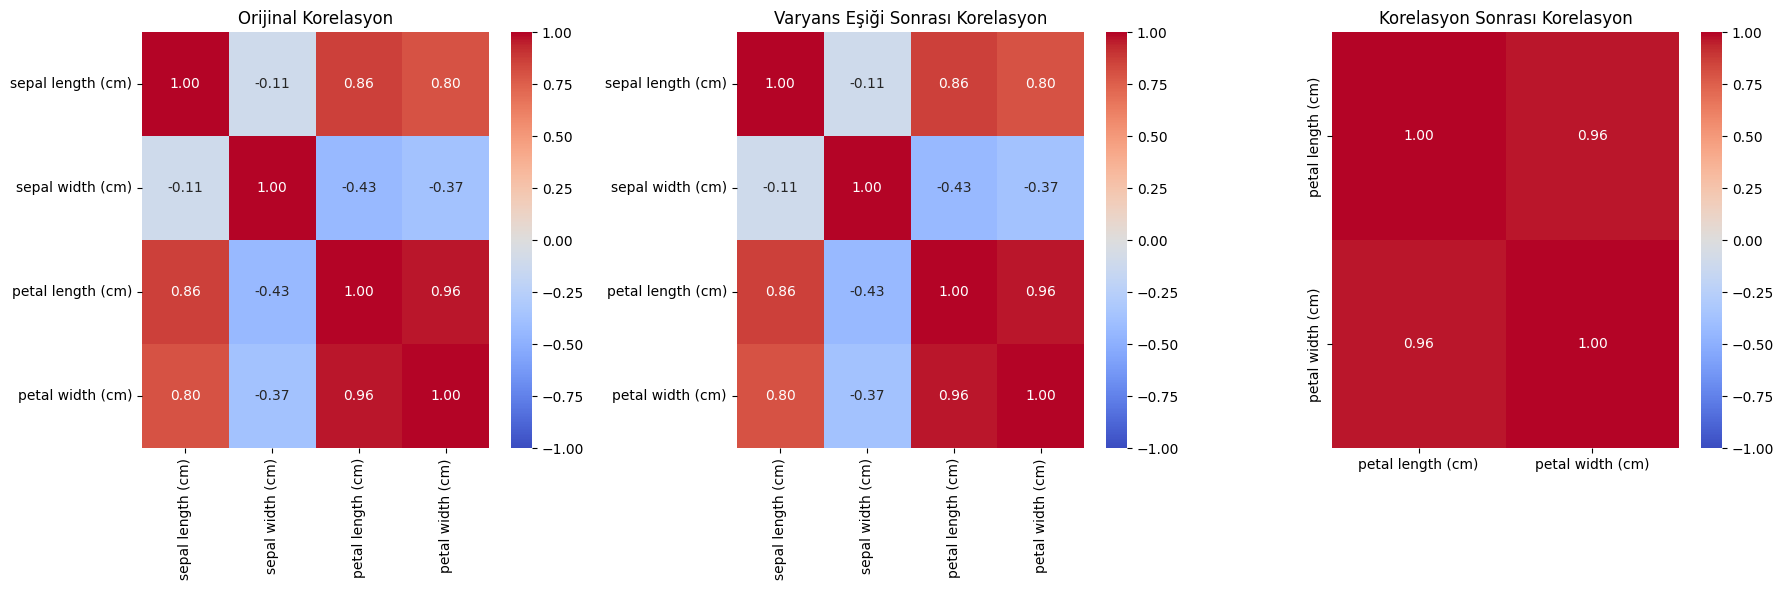

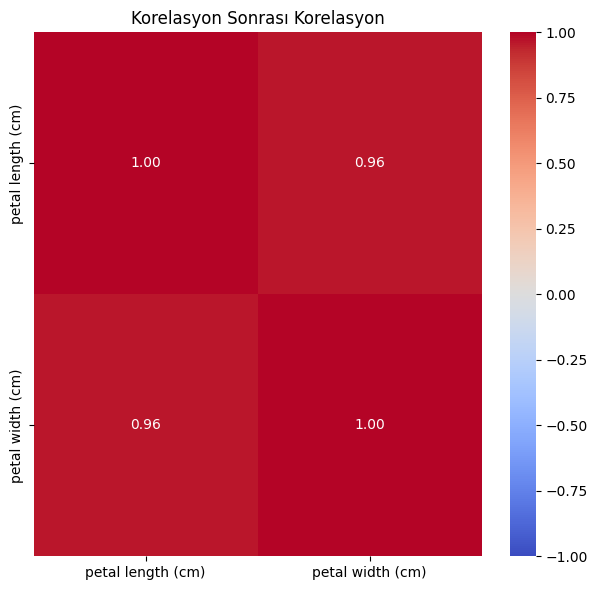

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, f_regression, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Adım: Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target
özellik_isimleri = iris.feature_names

# 2. Adım: Veri setini eğitim ve test kümelerine ayırma
X_eğitim, X_test, y_eğitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Adım: Varyans Eşiği Uygulama (Görselleştirme dahil)
varyans_esigi = VarianceThreshold(threshold=0.1)
X_eğitim_varyans = varyans_esigi.fit_transform(X_eğitim)
X_test_varyans = varyans_esigi.transform(X_test)

secilen_varyans = varyans_esigi.get_support(indices=True)
secilen_varyans_isimler = np.array(özellik_isimleri)[secilen_varyans]

print("Varyans Eşiği ile Seçilen Özellikler:", secilen_varyans_isimler)

# 4. Adım: Korelasyon Tabanlı Seçim (SelectKBest)
# f_regression yöntemiyle hedef ile özellik arasındaki lineer ilişkiye bakılır
k_best = SelectKBest(score_func=f_regression, k=2)  # En iyi 2 özelliği seçiyoruz
X_eğitim_kbest = k_best.fit_transform(X_eğitim_varyans, y_eğitim)
X_test_kbest = k_best.transform(X_test_varyans)

secilen_kbest = k_best.get_support(indices=True)
secilen_kbest_isimler = secilen_varyans_isimler[secilen_kbest]

print("Korelasyon ile Seçilen Özellikler:", secilen_kbest_isimler)

# 5. Adım: SelectFromModel Uygulama (Görselleştirme dahil)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
secici = SelectFromModel(random_forest, threshold="median")
random_forest.fit(X_eğitim_kbest, y_eğitim)
X_eğitim_secici = secici.fit_transform(X_eğitim_kbest, y_eğitim)
X_test_secici = secici.transform(X_test_kbest)

secilen_rf = secici.get_support(indices=True)
secilen_rf_isimler = secilen_kbest_isimler[secilen_rf]

print("Random Forest Modelinde Seçilen Özellikler:", secilen_rf_isimler)

# Görselleştirmeler (Korelasyon dahil)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(np.corrcoef(X_eğitim.T), annot=True, fmt=".2f",
            xticklabels=özellik_isimleri, yticklabels=özellik_isimleri,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Orijinal Korelasyon")

plt.subplot(1, 3, 2)
sns.heatmap(np.corrcoef(X_eğitim_varyans.T), annot=True, fmt=".2f",
            xticklabels=secilen_varyans_isimler, yticklabels=secilen_varyans_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Varyans Eşiği Sonrası Korelasyon")

plt.subplot(1, 3, 3)
sns.heatmap(np.corrcoef(X_eğitim_kbest.T), annot=True, fmt=".2f",
            xticklabels=secilen_kbest_isimler, yticklabels=secilen_kbest_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasyon Sonrası Korelasyon")

plt.tight_layout()
plt.show()

# İkinci görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(np.corrcoef(X_eğitim_kbest.T), annot=True, fmt=".2f",
            xticklabels=secilen_kbest_isimler, yticklabels=secilen_kbest_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasyon Sonrası Korelasyon")

if X_eğitim_secici.shape[1] > 1:
    plt.subplot(1, 2, 2)
    sns.heatmap(np.corrcoef(X_eğitim_secici.T), annot=True, fmt=".2f",
                xticklabels=secilen_rf_isimler, yticklabels=secilen_rf_isimler,
                cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Random Forest Sonrası Korelasyon")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 1. Örnek Veri Kümesi Oluşturma
# 10 örnek (satır) ve 5 özellik (sütun)
X = np.array([[0, 2, 1, 3, 4],
              [0, 1, 4, 3, 2],
              [0, 0, 1, 2, 2],
              [0, 1, 3, 2, 1],
              [0, 2, 1, 3, 4],
              [1, 2, 1, 3, 4],
              [1, 1, 4, 3, 2],
              [1, 0, 1, 2, 2],
              [1, 1, 3, 2, 1],
              [1, 2, 1, 3, 4]])
y = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])  # Hedef değişken (sınıflandırma)

# 2. Varyans Eşiği
varyans_esigi = VarianceThreshold(threshold=0.8)  # Varyansı 0.8'den düşük olan sütunları kaldır
X_varyans = varyans_esigi.fit_transform(X)

print("Orijinal X:\n", X)
print("\nVaryans Eşiği Sonrası X:\n", X_varyans)
print("Varyans Eşiği ile seçilen sütunlar:", varyans_esigi.get_support(indices=True)) # Seçilen sütunların indeksleri

# 3. Korelasyon (SelectKBest)
# f_classif: Sınıflandırma görevleri için ANOVA F-değerini kullanır
# k=2: En iyi 2 özelliği seçer
k_best = SelectKBest(score_func=f_classif, k=2)
X_kbest = k_best.fit_transform(X_varyans, y)

print("\nSelectKBest Sonrası X:\n", X_kbest)
print("SelectKBest ile seçilen sütunlar:", k_best.get_support(indices=True))

# 4. Model Tabanlı Seçim (SelectFromModel)
rf = RandomForestClassifier(n_estimators=10)  # Küçük bir orman
sfm = SelectFromModel(rf, threshold="mean") # Ortalamadan daha önemli olanları seçer
X_sfm = sfm.fit_transform(X_kbest, y)

print("\nSelectFromModel Sonrası X:\n", X_sfm)
print("SelectFromModel ile seçilen sütunlar:", sfm.get_support(indices=True))

Orijinal X:
 [[0 2 1 3 4]
 [0 1 4 3 2]
 [0 0 1 2 2]
 [0 1 3 2 1]
 [0 2 1 3 4]
 [1 2 1 3 4]
 [1 1 4 3 2]
 [1 0 1 2 2]
 [1 1 3 2 1]
 [1 2 1 3 4]]

Varyans Eşiği Sonrası X:
 [[1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]
 [1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]]
Varyans Eşiği ile seçilen sütunlar: [2 4]

SelectKBest Sonrası X:
 [[1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]
 [1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]]
SelectKBest ile seçilen sütunlar: [0 1]

SelectFromModel Sonrası X:
 [[1]
 [4]
 [1]
 [3]
 [1]
 [1]
 [4]
 [1]
 [3]
 [1]]
SelectFromModel ile seçilen sütunlar: [0]



PCA korelasyonlar çok yüksekse bunları arttırmanın bir anlamı yok.
Yüksek boyuttaki veri setlerindeki özellik sayısını azaltma işlemidir.
Amaç:
+veri kümesinin karmaşıklığını arttırmak
hesaplama maliyetini düşürmek
görselleştirmeyi kolaylaştırmak
aşırı öğrenmeyi önlemek
özellikler arasındaki çoklu doğrusallık sorununu çözmek

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#veri 2 boyutlu
veri=np.array ([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,12],
                [13,14,15,16]])
#veriyi ölçeklendir
scaler=StandardScaler()
veri_sc=scaler.fit_transform(veri)
print(veri_sc)
#PCA uygula (2 özelliğe indirge)
pca=PCA(n_components=2)
veri_pca=pca.fit_transform(veri_sc)
print(veri_pca)

[[-1.34164079 -1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079  1.34164079]]
[[-2.68328157e+00 -3.00991270e-16]
 [-8.94427191e-01  5.58663097e-17]
 [ 8.94427191e-01 -5.58663097e-17]
 [ 2.68328157e+00 -2.63747063e-16]]


PCA Veri görselleştirme alanında kullanılır.

EKSİK YANLIŞ VE MARJİNAL VERİLERLE ÇALIŞMA YÖNTEMİ
Veri temizliği çok önemlidir.



In [ ]:
#Eksik Veri Temizliği
import pandas as pd
import numpy as np

data={'A':[1,2,np.nan,4],
       'B':[5,np.nan,7,8],
       'C':['a','b','c',np.nan]}
df=pd.DataFrame(data)
print(df)
print(df.isnull())
print(df.isnull().sum())
print(df.isnull().sum().sum())


     A    B    C
0  1.0  5.0    a
1  2.0  NaN    b
2  NaN  7.0    c
3  4.0  8.0  NaN
       A      B      C
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True
A    1
B    1
C    1
dtype: int64
3


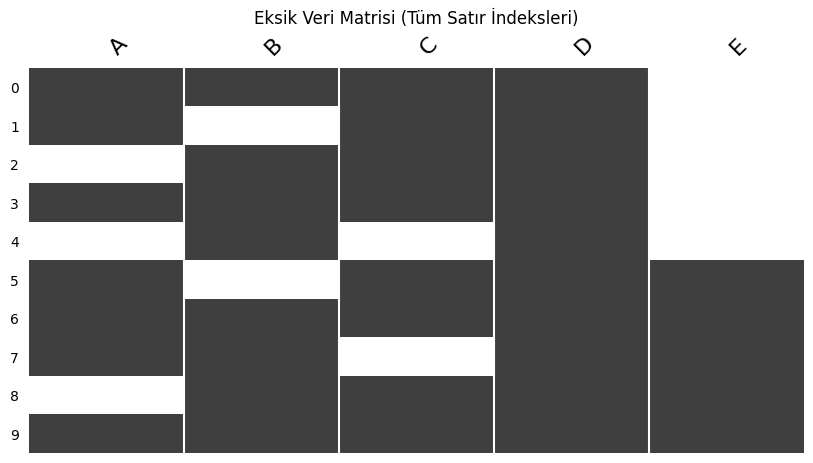

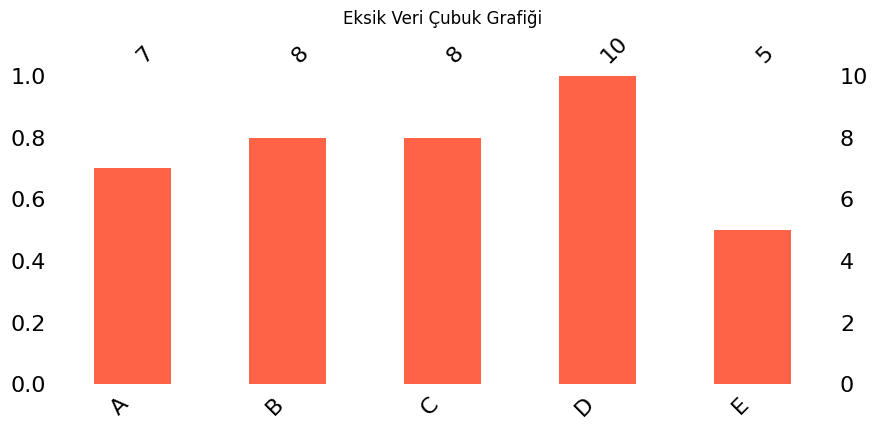

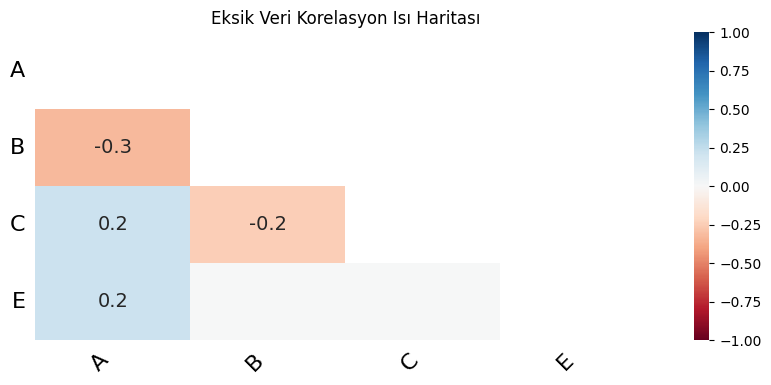

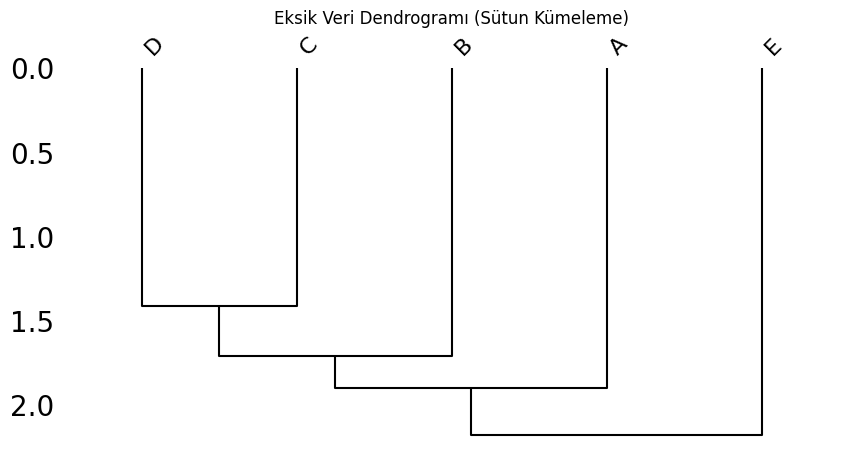

In [ ]:
# 📦 Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# 📊 Örnek veri: Bazı hücreler eksik (NaN)
data = {
    'A': [1, 2, np.nan, 4, np.nan, 6, 7, 8, np.nan, 10],
    'B': [11, np.nan, 13, 14, 15, np.nan, 17, 18, 19, 20],
    'C': [21, 22, 23, 24, np.nan, 26, 27, np.nan, 29, 30],
    'D': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    'E': [np.nan]*5 + [46, 47, 48, 49, 50]
}
df = pd.DataFrame(data)

# ----------------------------------------------------
# 1️⃣ Eksik Veri Matrisi (sparkline kapalı, tüm satır indeksleri açık)
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
msno.matrix(df, ax=ax, sparkline=False)  # sparkline kapalı
ax.set_yticks(np.arange(len(df)))         # Satır sayısı kadar yer işareti
ax.set_yticklabels(df.index, fontsize=10) # İndeksleri göster
plt.title("Eksik Veri Matrisi (Tüm Satır İndeksleri)")
plt.show()

# ----------------------------------------------------
# 2️⃣ Eksik Veri Çubuk Grafiği: Hangi sütunda ne kadar eksik?
msno.bar(df, figsize=(10, 4), color='tomato')
plt.title("Eksik Veri Çubuk Grafiği")
plt.show()

# ----------------------------------------------------
# 3️⃣ Eksik Veri Isı Haritası: Korelasyon ilişkileri (birlikte eksik olma)
msno.heatmap(df, figsize=(10, 4))
plt.title("Eksik Veri Korelasyon Isı Haritası")
plt.show()

# ----------------------------------------------------
# 4️⃣ Eksik Veri Dendrogramı: Eksiklik örüntüsüne göre sütun gruplama
msno.dendrogram(df, figsize=(10, 5))
plt.title("Eksik Veri Dendrogramı (Sütun Kümeleme)")
plt.show()